## 1.Data Preprocessing and EDA:

### 1.1. data cleaning and handling missing values

#### 1.1.1. reading data into a dataframe format

In [1]:
import pandas as pd
df = pd.read_csv('booksummaries.txt' , sep='\t' , header=None)

df.head()

,0,1,2,3,4,5,6
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...


#### 1.1.2. renaming the columns, editing columns type

In [2]:
df.rename(columns={0:'id' , 2:'name' , 3:'author' , 4:'publish_year' , 6:'summary'} , inplace=True)

In [100]:
#df = df.drop(columns=[1 , 5] , axis=1)
df.rename(columns={1:'txt' , 5:'genre'} , inplace=True)

In [101]:
df['publish_year'] = df['publish_year'].str[:4]

In [102]:
df.head()

,id,txt,name,author,publish_year,genre,summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...


In [103]:
df.dtypes

id               int64
txt             object
name            object
author          object
publish_year    object
genre           object
summary         object
dtype: object

In [104]:
import ast

df['genre'] = df['genre'].str.replace('u00e0', '', regex=False)

def extract_genres(genre_str):
    if isinstance(genre_str, str):  # Check if the input is a string
        genre_dict = ast.literal_eval(genre_str.replace('\\', ''))
        return list(genre_dict.values())
    return []  # Return an empty list for NaN or non-string values


df['genre_names'] = df['genre'].apply(extract_genres)
df = df.drop(columns=['txt', 'genre'])


In [105]:
df.shape

(16559, 6)

#### 1.1.1.3 handling missing values: publish year , genres , author

In [106]:
import numpy as np
df['genre_names'] = df['genre_names'].apply(lambda x: np.nan if len(x) == 0 else x)


In [107]:
print(df.isna().sum())

id                 0
name               0
author          2382
publish_year    5610
summary            0
genre_names     3718
dtype: int64


In [108]:
for index in df[df['name'].str.match(r'^Book of')].index:
    df.at[index, 'genre_names'] = ['Religious text']

In [109]:
for index in df[df['name'].str.match(r'^Book of')].index:
    df.at[index, 'publish_year'] = 0

In [111]:
df.loc[
    (df['genre_names'].apply(lambda x: x == ['Religious text'])) & 
    (df['author'].isna()) & 
    (df['publish_year'].isna()), 
    'publish_year'
] = 0

In [ ]:
for index in df[df['name'].str.match(r'^Book of')].index:
    # Extract the name after 'Book of'
    x = df.at[index, 'name'].replace('Book of ', '')
    df.at[index, 'author'] = x

In [112]:
filtered_df = df[df['genre_names'].apply(lambda x: x == ['Religious text'])]
filtered_df

,id,name,author,publish_year,summary,genre_names
10,4331,Book of Joshua,Joshua,0,(Chapter 1 is the first of three important mo...,[Religious text]
11,4332,Book of Ezra,Ezra,0,"For the Bible text, see Bible Gateway (opens ...",[Religious text]
12,4376,Book of Numbers,Numbers,0,"God orders Moses, in the wilderness of Sinai,...",[Religious text]
13,4381,Book of Ruth,Ruth,0,During the time of the Judges when there was ...,[Religious text]
14,4382,Book of Esther,Esther,0,"Ahasuerus, ruler of a massive Persian empire,...",[Religious text]
15,4386,Book of Job,Job,0,The book of Job tells the story of an extreme...,[Religious text]
16,4449,Book of Hosea,Hosea,0,"First, Hosea was directed by God to marry a p...",[Religious text]
17,4451,Book of Jonah,Jonah,0,The plot centers on a conflict between Jonah ...,[Religious text]
18,4452,Book of Micah,Micah,0,* The Heading (1:1): As is typical of prophet...,[Religious text]
19,4454,Book of Haggai,Haggai,0,Haggai's message is filled with an urgency fo...,[Religious text]


In [113]:
df.head(30)

,id,name,author,publish_year,summary,genre_names
0,620,Animal Farm,George Orwell,1945,"Old Major, the old boar on the Manor Farm, ca...","[Roman clef, Satire, Children's literature, S..."
1,843,A Clockwork Orange,Anthony Burgess,1962,"Alex, a teenager living in near-future Englan...","[Science Fiction, Novella, Speculative fiction..."
2,986,The Plague,Albert Camus,1947,The text of The Plague is divided into five p...,"[Existentialism, Fiction, Absurdist fiction, N..."
3,1756,An Enquiry Concerning Human Understanding,David Hume,NaN,The argument of the Enquiry proceeds by a ser...,NaN
4,2080,A Fire Upon the Deep,Vernor Vinge,NaN,The novel posits that space around the Milky ...,"[Hard science fiction, Science Fiction, Specul..."
5,2152,All Quiet on the Western Front,Erich Maria Remarque,1929,"The book tells the story of Paul Bäumer, a Ge...","[War novel, Roman clef]"
6,2890,A Wizard of Earthsea,Ursula K. Le Guin,1968,"Ged is a young boy on Gont, one of the larger...","[Children's literature, Fantasy, Speculative f..."
7,2950,Anyone Can Whistle,Arthur Laurents,NaN,The story is set in an imaginary American tow...,NaN
8,4081,Blade Runner 3: Replicant Night,K. W. Jeter,1996,"Living on Mars, Deckard is acting as a consul...","[Science Fiction, Speculative fiction]"
9,4082,Blade Runner 2: The Edge of Human,K. W. Jeter,1995,Beginning several months after the events in ...,"[Science Fiction, Speculative fiction]"


In [114]:
print(df.isna().sum())

id                 0
name               0
author          2372
publish_year    5598
summary            0
genre_names     3708
dtype: int64


In [115]:
x =df.groupby(['author']).count()
x

,id,name,publish_year,summary,genre_names
author,,,,,
'Asta Bowen,1,1,1,1,1
A. A. Attanasio,2,2,2,2,2
A. A. Milne,2,2,2,2,2
A. E. W. Mason,2,2,2,2,2
A. E. van Vogt,11,11,10,11,11
...,...,...,...,...,...
Élisabeth Vonarburg,1,1,1,1,1
Émile Gaboriau,1,1,0,1,1
Émile Zola,16,16,15,16,15


In [116]:
y = df[df['author'] == 'A. E. van Vogt']
y

,id,name,author,publish_year,summary,genre_names
1248,544984,The World of Null-A,A. E. van Vogt,1948,"Gilbert Gosseyn, a man living in an apparent ...","[Science Fiction, Speculative fiction, Novel]"
1392,623749,The Voyage of the Space Beagle,A. E. van Vogt,1950,The main protagonist of the novel is Dr. Elli...,"[Science Fiction, Speculative fiction]"
1819,911169,Slan,A. E. van Vogt,1946,"Slans are evolved humans, named after their a...","[Science Fiction, Speculative fiction, Fantasy..."
2262,1234613,The Weapon Shops of Isher,A. E. van Vogt,1951,The Weapon Shops of Isher and its sequel The ...,"[Science Fiction, Speculative fiction, Fiction..."
9315,9917470,Children of Tomorrow,A. E. van Vogt,1970,Commander John Lane returns from a ten year m...,"[Science Fiction, Speculative fiction]"
10297,12216391,Rogue Ship,A. E. van Vogt,1965,Rogue Ship is a standalone novel in a form of...,"[Science Fiction, Speculative fiction]"
11814,16277049,The Book of Ptath,A. E. van Vogt,1947,The novel concerns a tank-battle casualty rei...,[Science Fiction]
12090,17076520,Empire of the Atom,A. E. van Vogt,1957,The novel concerns adventures of a mutant gen...,"[Science Fiction, Speculative fiction]"
12579,18558694,The Silkie,A. E. van Vogt,NaN,"The novel has four sections, each consisting ...","[Science Fiction, Speculative fiction]"
13722,21829284,The Universe Maker,A. E. van Vogt,1953,"Morton Cargill, Korean War soldier, accidenta...","[Science Fiction, Novel]"


In [117]:
def fill_missing_years(df):
    #in rows with missing 'publish_year'
    for index, row in df[df['publish_year'].isnull()].iterrows():
        author = row['author']
        #the first non-null publish_year for the same author
        matching_year = df.loc[(df['author'] == author) & (df['publish_year'].notnull()), 'publish_year']
        
        if not matching_year.empty:
            # Fill the missing publish_year with the found year
            df.at[index, 'publish_year'] = matching_year.iloc[0]

fill_missing_years(df)

In [118]:
z = df[df['author'] == 'A. E. van Vogt']
z

,id,name,author,publish_year,summary,genre_names
1248,544984,The World of Null-A,A. E. van Vogt,1948,"Gilbert Gosseyn, a man living in an apparent ...","[Science Fiction, Speculative fiction, Novel]"
1392,623749,The Voyage of the Space Beagle,A. E. van Vogt,1950,The main protagonist of the novel is Dr. Elli...,"[Science Fiction, Speculative fiction]"
1819,911169,Slan,A. E. van Vogt,1946,"Slans are evolved humans, named after their a...","[Science Fiction, Speculative fiction, Fantasy..."
2262,1234613,The Weapon Shops of Isher,A. E. van Vogt,1951,The Weapon Shops of Isher and its sequel The ...,"[Science Fiction, Speculative fiction, Fiction..."
9315,9917470,Children of Tomorrow,A. E. van Vogt,1970,Commander John Lane returns from a ten year m...,"[Science Fiction, Speculative fiction]"
10297,12216391,Rogue Ship,A. E. van Vogt,1965,Rogue Ship is a standalone novel in a form of...,"[Science Fiction, Speculative fiction]"
11814,16277049,The Book of Ptath,A. E. van Vogt,1947,The novel concerns a tank-battle casualty rei...,[Science Fiction]
12090,17076520,Empire of the Atom,A. E. van Vogt,1957,The novel concerns adventures of a mutant gen...,"[Science Fiction, Speculative fiction]"
12579,18558694,The Silkie,A. E. van Vogt,1948,"The novel has four sections, each consisting ...","[Science Fiction, Speculative fiction]"
13722,21829284,The Universe Maker,A. E. van Vogt,1953,"Morton Cargill, Korean War soldier, accidenta...","[Science Fiction, Novel]"


#### Genres:

In [119]:
x =df.groupby(['author']).count()
x

,id,name,publish_year,summary,genre_names
author,,,,,
'Asta Bowen,1,1,1,1,1
A. A. Attanasio,2,2,2,2,2
A. A. Milne,2,2,2,2,2
A. E. W. Mason,2,2,2,2,2
A. E. van Vogt,11,11,11,11,11
...,...,...,...,...,...
Élisabeth Vonarburg,1,1,1,1,1
Émile Gaboriau,1,1,0,1,1
Émile Zola,16,16,16,16,15


In [120]:
q =  df[df['author'] == 'Émile Zola']
q

,id,name,author,publish_year,summary,genre_names
428,155591,La Fortune des Rougon,Émile Zola,1871,After a stirring opening on the eve of the co...,NaN
429,155592,Son Excellence Eugène Rougon,Émile Zola,1876,The novel opens in 1857 with Rougon's career ...,[Novel]
430,155594,La Curée,Émile Zola,1871,The book opens with scenes of astonishing opu...,[Novel]
431,155597,L'Argent,Émile Zola,1891,"The novel takes place in 1864-1869, beginning...",[Novel]
611,213406,Au Bonheur des Dames,Émile Zola,1883,The events of Au Bonheur des Dames cover appr...,[Novel]
926,360837,Germinal,Émile Zola,1885,The novel's central character is Étienne Lant...,[Novel]
1151,490935,Assomoir,Émile Zola,1877,The novel is essentially the story of Gervais...,[Novel]
1653,814647,Nana,Émile Zola,1880,Nana tells the story of Nana Coupeau's rise f...,[Novel]
2347,1285975,Thérèse Raquin,Émile Zola,1867,Thérèse Raquin is the daughter of a French ca...,"[Psychology, Psychological novel]"
8264,7930528,La Joie de vivre,Émile Zola,1884,The novel opens in 1863 and covers about 10 y...,[Novel]


In [121]:
'''def fill_missing_genres(df):
    #in rows with missing 'publish_year'
    for index, row in df[df['genre_names'].isnull()].iterrows():
        author = row['author']
        #the first non-null publish_year for the same author
        matching_year = df.loc[(df['author'] == author) & (df['genre_names'].notnull()), 'genre_names']
        
        if not matching_year.empty:
            # Fill the missing publish_year with the found year
            df.at[index, 'genre_names'] = matching_year.iloc[0]

fill_missing_genres(df)'''

"def fill_missing_genres(df):\n    #in rows with missing 'publish_year'\n    for index, row in df[df['genre_names'].isnull()].iterrows():\n        author = row['author']\n        #the first non-null publish_year for the same author\n        matching_year = df.loc[(df['author'] == author) & (df['genre_names'].notnull()), 'genre_names']\n        \n        if not matching_year.empty:\n            # Fill the missing publish_year with the found year\n            df.at[index, 'genre_names'] = matching_year.iloc[0]\n\nfill_missing_genres(df)"

In [ ]:
df['genre_names'] = df['genre_names'].apply(lambda x: np.nan if isinstance(x, list) and len(x) == 0 else x)

In [122]:
def fill_missing_genres(df):
    for index, row in df[df['genre_names'].isnull()].iterrows():
        author = row['author']
        matching_genres = df.loc[df['author'] == author, 'genre_names'].dropna()
        
        if not matching_genres.empty:
            # Combine all genres into a list
            combined_genres = [genre for sublist in matching_genres for genre in sublist]
            # Remove duplicates by converting to a set and back to a list
            df.at[index, 'genre_names'] = list(set(combined_genres))

fill_missing_genres(df)



In [123]:
df

,id,name,author,publish_year,summary,genre_names
0,620,Animal Farm,George Orwell,1945,"Old Major, the old boar on the Manor Farm, ca...","[Roman clef, Satire, Children's literature, S..."
1,843,A Clockwork Orange,Anthony Burgess,1962,"Alex, a teenager living in near-future Englan...","[Science Fiction, Novella, Speculative fiction..."
2,986,The Plague,Albert Camus,1947,The text of The Plague is divided into five p...,"[Existentialism, Fiction, Absurdist fiction, N..."
3,1756,An Enquiry Concerning Human Understanding,David Hume,NaN,The argument of the Enquiry proceeds by a ser...,NaN
4,2080,A Fire Upon the Deep,Vernor Vinge,1981,The novel posits that space around the Milky ...,"[Hard science fiction, Science Fiction, Specul..."
...,...,...,...,...,...,...
16554,36934824,Under Wildwood,Colin Meloy,2012,"Prue McKeel, having rescued her brother from ...",NaN
16555,37054020,Transfer of Power,Vince Flynn,2000,The reader first meets Rapp while he is doing...,"[Thriller, Fiction]"
16556,37122323,Decoded,Jay-Z,2010,The book follows very rough chronological ord...,[Autobiography]
16557,37132319,America Again: Re-becoming The Greatness We Ne...,Stephen Colbert,2012,Colbert addresses topics including Wall Stree...,NaN


In [124]:
df.shape

(16559, 6)

In [125]:
p =  df[df['author'] == 'Émile Zola']
p

,id,name,author,publish_year,summary,genre_names
428,155591,La Fortune des Rougon,Émile Zola,1871,After a stirring opening on the eve of the co...,"[Psychological novel, Short story, Psychology,..."
429,155592,Son Excellence Eugène Rougon,Émile Zola,1876,The novel opens in 1857 with Rougon's career ...,[Novel]
430,155594,La Curée,Émile Zola,1871,The book opens with scenes of astonishing opu...,[Novel]
431,155597,L'Argent,Émile Zola,1891,"The novel takes place in 1864-1869, beginning...",[Novel]
611,213406,Au Bonheur des Dames,Émile Zola,1883,The events of Au Bonheur des Dames cover appr...,[Novel]
926,360837,Germinal,Émile Zola,1885,The novel's central character is Étienne Lant...,[Novel]
1151,490935,Assomoir,Émile Zola,1877,The novel is essentially the story of Gervais...,[Novel]
1653,814647,Nana,Émile Zola,1880,Nana tells the story of Nana Coupeau's rise f...,[Novel]
2347,1285975,Thérèse Raquin,Émile Zola,1867,Thérèse Raquin is the daughter of a French ca...,"[Psychology, Psychological novel]"
8264,7930528,La Joie de vivre,Émile Zola,1884,The novel opens in 1863 and covers about 10 y...,[Novel]


In [126]:
print(df.isna().sum())

id                 0
name               0
author          2372
publish_year    3247
summary            0
genre_names     2748
dtype: int64


In [127]:
nan_count = df[df[['genre_names', 'publish_year', 'author']].isnull().all(axis=1)].shape[0]
nan_count

1320

In [128]:
df = df.sort_values(by=['id'] , ascending=True)
df.head(30)

,id,name,author,publish_year,summary,genre_names
0,620,Animal Farm,George Orwell,1945,"Old Major, the old boar on the Manor Farm, ca...","[Roman clef, Satire, Children's literature, S..."
1,843,A Clockwork Orange,Anthony Burgess,1962,"Alex, a teenager living in near-future Englan...","[Science Fiction, Novella, Speculative fiction..."
2,986,The Plague,Albert Camus,1947,The text of The Plague is divided into five p...,"[Existentialism, Fiction, Absurdist fiction, N..."
3,1756,An Enquiry Concerning Human Understanding,David Hume,NaN,The argument of the Enquiry proceeds by a ser...,NaN
4,2080,A Fire Upon the Deep,Vernor Vinge,1981,The novel posits that space around the Milky ...,"[Hard science fiction, Science Fiction, Specul..."
5,2152,All Quiet on the Western Front,Erich Maria Remarque,1929,"The book tells the story of Paul Bäumer, a Ge...","[War novel, Roman clef]"
6,2890,A Wizard of Earthsea,Ursula K. Le Guin,1968,"Ged is a young boy on Gont, one of the larger...","[Children's literature, Fantasy, Speculative f..."
7,2950,Anyone Can Whistle,Arthur Laurents,NaN,The story is set in an imaginary American tow...,NaN
8,4081,Blade Runner 3: Replicant Night,K. W. Jeter,1996,"Living on Mars, Deckard is acting as a consul...","[Science Fiction, Speculative fiction]"
9,4082,Blade Runner 2: The Edge of Human,K. W. Jeter,1995,Beginning several months after the events in ...,"[Science Fiction, Speculative fiction]"


In [129]:
#df.to_csv('data.csv', index=False)

In [130]:
'''import pandas as pd
df = pd.read_csv('data.csv')
df['genre_names'] = df['genre_names'].apply(
    lambda x: x if isinstance(x, list) else [x] if pd.notna(x) else []
)'''

"import pandas as pd\ndf = pd.read_csv('data.csv')\ndf['genre_names'] = df['genre_names'].apply(\n    lambda x: x if isinstance(x, list) else [x] if pd.notna(x) else []\n)"

In [131]:
df.columns

Index(['id', 'name', 'author', 'publish_year', 'summary', 'genre_names'], dtype='object')

In [132]:
df.head(5)

,id,name,author,publish_year,summary,genre_names
0,620,Animal Farm,George Orwell,1945,"Old Major, the old boar on the Manor Farm, ca...","[Roman clef, Satire, Children's literature, S..."
1,843,A Clockwork Orange,Anthony Burgess,1962,"Alex, a teenager living in near-future Englan...","[Science Fiction, Novella, Speculative fiction..."
2,986,The Plague,Albert Camus,1947,The text of The Plague is divided into five p...,"[Existentialism, Fiction, Absurdist fiction, N..."
3,1756,An Enquiry Concerning Human Understanding,David Hume,NaN,The argument of the Enquiry proceeds by a ser...,NaN
4,2080,A Fire Upon the Deep,Vernor Vinge,1981,The novel posits that space around the Milky ...,"[Hard science fiction, Science Fiction, Specul..."


In [133]:
df.dropna(inplace=True)

In [134]:
print(df.isna().sum())

id              0
name            0
author          0
publish_year    0
summary         0
genre_names     0
dtype: int64


In [135]:
df = df.dropna(subset=['publish_year'])

In [136]:
print(df.isna().sum())

id              0
name            0
author          0
publish_year    0
summary         0
genre_names     0
dtype: int64


In [137]:
print(df['genre_names'].apply(type))


0        <class 'list'>
1        <class 'list'>
2        <class 'list'>
4        <class 'list'>
5        <class 'list'>
              ...      
16551    <class 'list'>
16552    <class 'list'>
16555    <class 'list'>
16556    <class 'list'>
16558    <class 'list'>
Name: genre_names, Length: 12070, dtype: object


In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

df_exploded = df.explode('genre_names')


In [139]:
print(df_exploded['genre_names'].apply(type))


0        <class 'str'>
0        <class 'str'>
0        <class 'str'>
0        <class 'str'>
0        <class 'str'>
             ...      
16555    <class 'str'>
16555    <class 'str'>
16556    <class 'str'>
16558    <class 'str'>
16558    <class 'str'>
Name: genre_names, Length: 31542, dtype: object


In [140]:
df_exploded

,id,name,author,publish_year,summary,genre_names
0,620,Animal Farm,George Orwell,1945,"Old Major, the old boar on the Manor Farm, ca...",Roman clef
0,620,Animal Farm,George Orwell,1945,"Old Major, the old boar on the Manor Farm, ca...",Satire
0,620,Animal Farm,George Orwell,1945,"Old Major, the old boar on the Manor Farm, ca...",Children's literature
0,620,Animal Farm,George Orwell,1945,"Old Major, the old boar on the Manor Farm, ca...",Speculative fiction
0,620,Animal Farm,George Orwell,1945,"Old Major, the old boar on the Manor Farm, ca...",Fiction
...,...,...,...,...,...,...
16555,37054020,Transfer of Power,Vince Flynn,2000,The reader first meets Rapp while he is doing...,Thriller
16555,37054020,Transfer of Power,Vince Flynn,2000,The reader first meets Rapp while he is doing...,Fiction
16556,37122323,Decoded,Jay-Z,2010,The book follows very rough chronological ord...,Autobiography
16558,37159503,Poor Folk,Fyodor Dostoyevsky,1846,Makar Devushkin and Varvara Dobroselova are s...,Epistolary novel


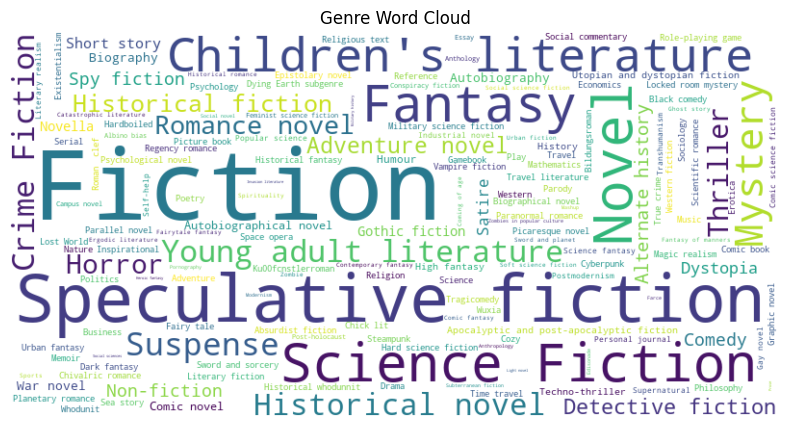

In [141]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud



genre_data = df_exploded['genre_names'].value_counts()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()


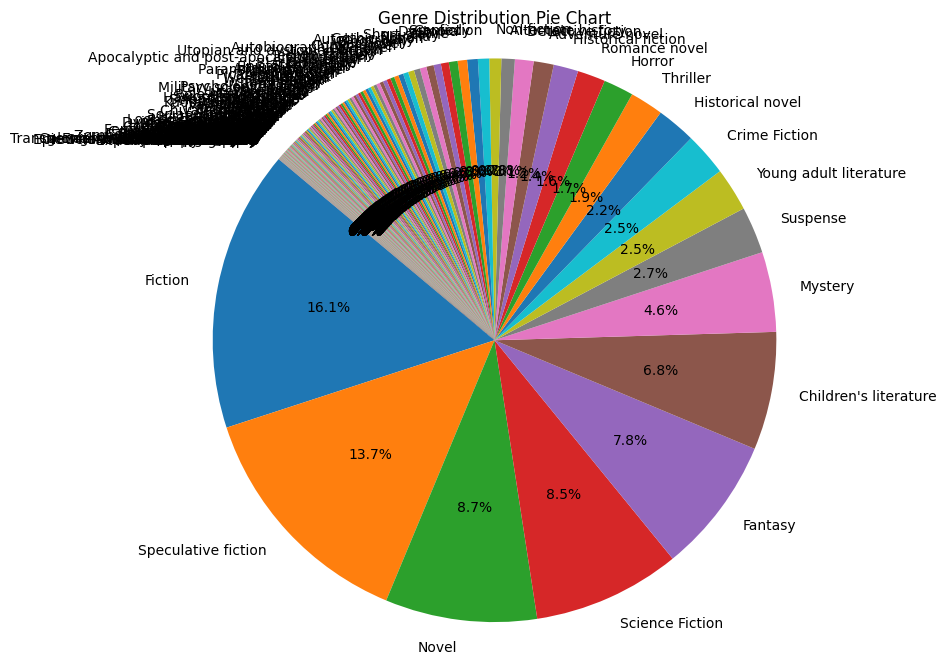

In [142]:
'''
labels = genre_data.index
sizes = genre_data.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Genre Distribution Pie Chart')
plt.show()'''

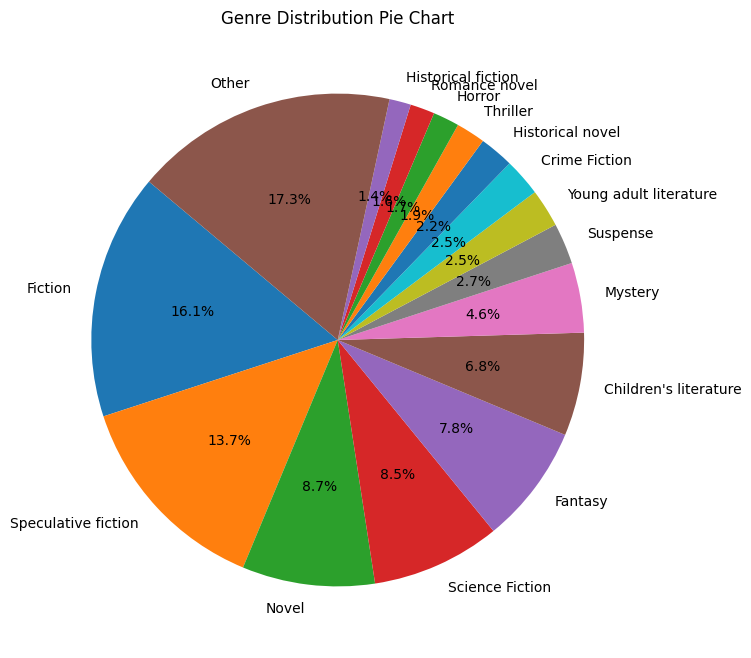

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

# genre_data = df_exploded['genre_names'].value_counts()

threshold = 400  
genre_data_grouped = genre_data[genre_data >= threshold]
other_count = genre_data[genre_data < threshold].sum()
if other_count > 0:
    genre_data_grouped['Other'] = other_count

labels = genre_data_grouped.index
sizes = genre_data_grouped.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Genre Distribution Pie Chart')
plt.show()


C:\Users\Parinaz\AppData\Local\Temp\ipykernel_10768\3445057951.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=books_per_year.index, y=books_per_year.values, palette='viridis')


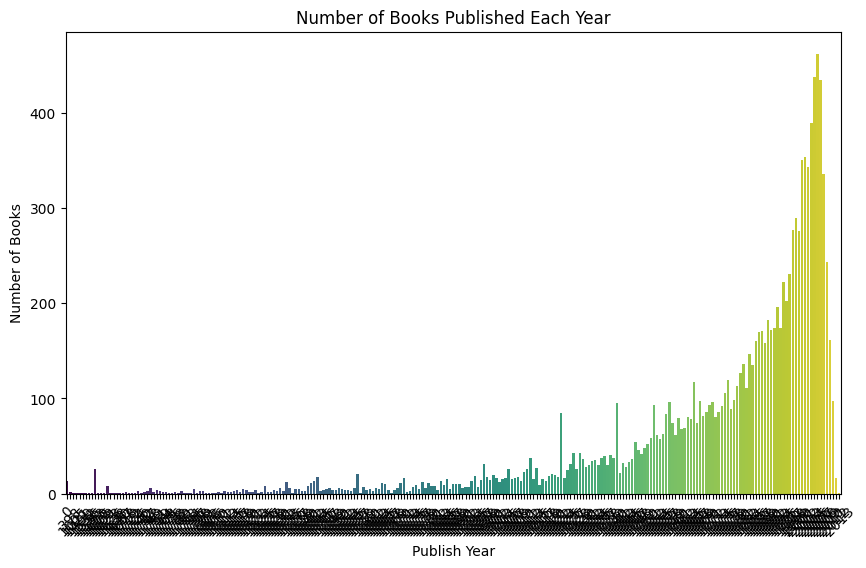

In [147]:

df['publish_year'] = pd.to_numeric(df['publish_year'], errors='coerce')
books_per_year = df['publish_year'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
sns.barplot(x=books_per_year.index, y=books_per_year.values, palette='viridis')
plt.title('Number of Books Published Each Year')
plt.xlabel('Publish Year')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()


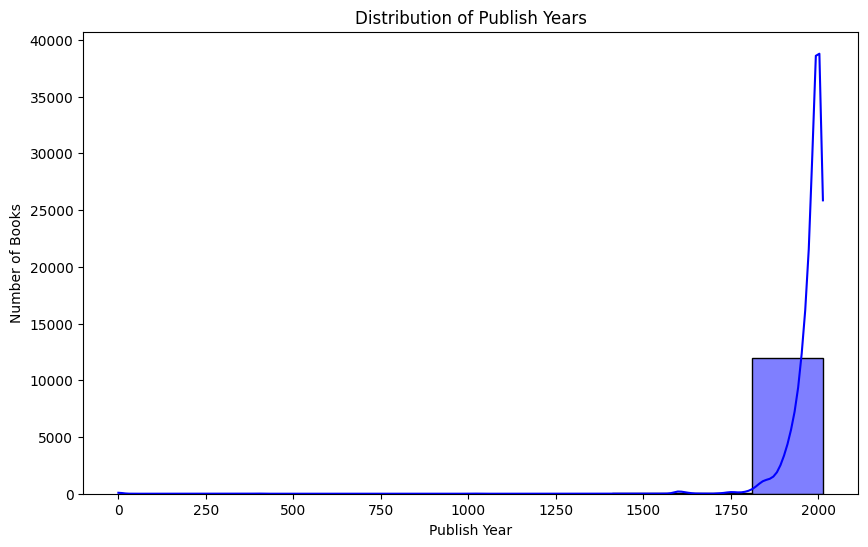

In [148]:
plt.figure(figsize=(10, 6))
sns.histplot(df['publish_year'], bins=10, kde=True, color='blue')
plt.title('Distribution of Publish Years')
plt.xlabel('Publish Year')
plt.ylabel('Number of Books')
plt.show()